<a href="https://colab.research.google.com/github/Lucas-O-S/N2-2B_AnaliseDados/blob/main/analiseestudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>

Aluno(a): Adriana Kaori Kakazu - RA: 082220004 <br/>
Aluno(a): Lucas Oliveira Silva - RA: 082220019 <br/>
Aluno(a): Vitoria Kaori Kuriyama - RA: 082220005 <br/>
Data: 07/06/2025 <br/>

#1: Preprarando Dataset

##1.1: Importações


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import ttest_ind



In [4]:
UrlDataset = "https://raw.githubusercontent.com/Lucas-O-S/N2-2B_AnaliseDados/refs/heads/main/dataset/student_habits_performance.csv"

dataset = pd.read_csv(UrlDataset, sep=",")

#2: Análise Exploratória de Dados (EDA)

##2.1: Verificação dos dados

Objetivo tratar a base de dados: verificar a presença de dados ausentes (missing values), valores duplicados ou inconsistências nos dados antes de iniciar as análises

### 2.1.1: Dados ausentes

In [5]:
print(dataset.isnull().sum())

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


Remover linhas com dados ausentes

In [6]:
dataset = dataset.dropna()

Verificar se foram removidas

In [7]:
print(dataset.isnull().sum())

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


### 2.1.2: Dados duplicados

In [8]:
print(f'Duplicatas: {dataset.duplicated().sum()} linhas')

Duplicatas: 0 linhas


Temos 0 linhas duplicatas, entretanto se existissem utilizariamos os eguinte comando

In [9]:
dataset = dataset.drop_duplicates()

### 2.1.3: inconsistências nos dados

Verificar os valores das colunas

In [10]:
for col in dataset.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColuna: {col}")
    print(dataset[col].unique())


Coluna: student_id
['S1000' 'S1001' 'S1002' 'S1003' 'S1004' 'S1005' 'S1006' 'S1007' 'S1008'
 'S1009' 'S1011' 'S1012' 'S1013' 'S1014' 'S1015' 'S1016' 'S1017' 'S1018'
 'S1019' 'S1020' 'S1021' 'S1022' 'S1023' 'S1024' 'S1025' 'S1026' 'S1027'
 'S1028' 'S1029' 'S1030' 'S1031' 'S1032' 'S1034' 'S1035' 'S1036' 'S1037'
 'S1038' 'S1039' 'S1040' 'S1041' 'S1042' 'S1043' 'S1044' 'S1045' 'S1046'
 'S1048' 'S1049' 'S1050' 'S1051' 'S1052' 'S1053' 'S1054' 'S1055' 'S1056'
 'S1057' 'S1058' 'S1059' 'S1060' 'S1061' 'S1062' 'S1063' 'S1064' 'S1065'
 'S1066' 'S1067' 'S1068' 'S1069' 'S1070' 'S1071' 'S1072' 'S1073' 'S1075'
 'S1076' 'S1077' 'S1078' 'S1079' 'S1080' 'S1081' 'S1082' 'S1083' 'S1084'
 'S1085' 'S1086' 'S1087' 'S1088' 'S1089' 'S1090' 'S1091' 'S1092' 'S1094'
 'S1095' 'S1096' 'S1097' 'S1098' 'S1099' 'S1101' 'S1103' 'S1104' 'S1105'
 'S1106' 'S1108' 'S1109' 'S1110' 'S1111' 'S1112' 'S1113' 'S1114' 'S1118'
 'S1119' 'S1120' 'S1121' 'S1122' 'S1123' 'S1124' 'S1125' 'S1126' 'S1127'
 'S1128' 'S1129' 'S1130' 'S1131

Nas colunas categóricas, foram observadas possíveis inconsistências de capitalização (maiúsculas/minúsculas), como:

Gender: valores como "male" e "Male"

Exercise: "yes", "Yes", "No", "no"
etc.

Vamos verificar o nome das colunas


In [11]:
print(dataset.columns.tolist())

['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']


Corrigir nomes de colunas: remover espaços extras, o que não tem, mas caso tenha, é um passo importante

In [12]:
dataset.columns = dataset.columns.str.strip()

Lista de colunas a serem corrigidas

In [13]:
categorical_columns = [
    'gender',
    'diet_quality',
    'exercise_frequency',
    'parental_education_level',
    'extracurricular_participation'
]

Identificar automaticamente colunas categóricas (do tipo object ou category)

In [14]:
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns

Padronizar os valores: capitalização e remoção de espaços extras nos dados

In [15]:
for col in categorical_columns:
    dataset.loc[:, col] = dataset[col].astype(str).str.strip().str.capitalize()

Verificar se ainda existem valores unicos/repetidos que podem indicar inconsistencias


In [16]:
for col in dataset.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColuna: {col}")
    print(dataset[col].unique())


Coluna: student_id
['S1000' 'S1001' 'S1002' 'S1003' 'S1004' 'S1005' 'S1006' 'S1007' 'S1008'
 'S1009' 'S1011' 'S1012' 'S1013' 'S1014' 'S1015' 'S1016' 'S1017' 'S1018'
 'S1019' 'S1020' 'S1021' 'S1022' 'S1023' 'S1024' 'S1025' 'S1026' 'S1027'
 'S1028' 'S1029' 'S1030' 'S1031' 'S1032' 'S1034' 'S1035' 'S1036' 'S1037'
 'S1038' 'S1039' 'S1040' 'S1041' 'S1042' 'S1043' 'S1044' 'S1045' 'S1046'
 'S1048' 'S1049' 'S1050' 'S1051' 'S1052' 'S1053' 'S1054' 'S1055' 'S1056'
 'S1057' 'S1058' 'S1059' 'S1060' 'S1061' 'S1062' 'S1063' 'S1064' 'S1065'
 'S1066' 'S1067' 'S1068' 'S1069' 'S1070' 'S1071' 'S1072' 'S1073' 'S1075'
 'S1076' 'S1077' 'S1078' 'S1079' 'S1080' 'S1081' 'S1082' 'S1083' 'S1084'
 'S1085' 'S1086' 'S1087' 'S1088' 'S1089' 'S1090' 'S1091' 'S1092' 'S1094'
 'S1095' 'S1096' 'S1097' 'S1098' 'S1099' 'S1101' 'S1103' 'S1104' 'S1105'
 'S1106' 'S1108' 'S1109' 'S1110' 'S1111' 'S1112' 'S1113' 'S1114' 'S1118'
 'S1119' 'S1120' 'S1121' 'S1122' 'S1123' 'S1124' 'S1125' 'S1126' 'S1127'
 'S1128' 'S1129' 'S1130' 'S1131

##2.2: Estatísticas Descritivas

### 2.2.1: Descrevendo dataset

É possivel observar a quantidade, a media, desvio padrão, valor minimo, quartis e valor maximo de cada coluna


In [17]:
dataset.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


###2.2.2: Frequencia de Valores Unicos

In [18]:
dataset.select_dtypes(include='object').nunique()

,0
student_id,909
gender,3
part_time_job,2
diet_quality,3
parental_education_level,3
internet_quality,3
extracurricular_participation,2


### 2.2.3: Valores Fora do Padrão

In [19]:
Q1 = dataset['exam_score'].quantile(0.25)
Q3 = dataset['exam_score'].quantile(0.75)
IQR = Q3 - Q1

outliers = dataset[(dataset['exam_score'] < Q1 - 1.5 * IQR) | (dataset['exam_score'] > Q3 + 1.5 * IQR)]
print(f"Número de outliers em 'exam_score': {len(outliers)}")

Número de outliers em 'exam_score': 2


Dentre as notas dos alunos a dois registros que se encontram fora do padrão

##2.3: Visualizações Gráficas

#Gráfico: Nota média por horas de sono

<ipython-input-20-c3e0d3f604bd>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_sono = dataset.groupby('faixa_sono')['exam_score'].mean()


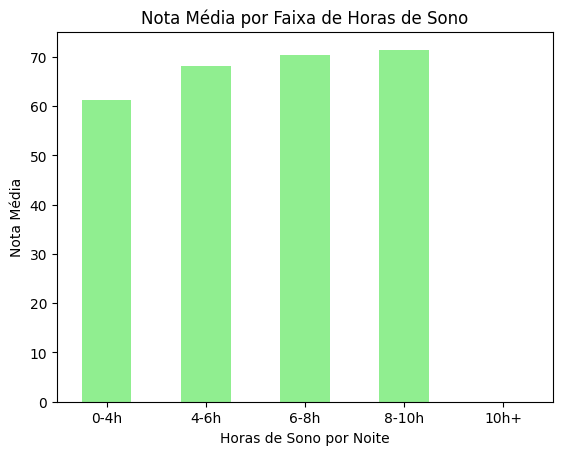

In [20]:
dataset['faixa_sono'] = pd.cut(dataset['sleep_hours'],
                               bins=[0, 4, 6, 8, 10, 12],
                               labels=['0-4h', '4-6h', '6-8h', '8-10h', '10h+'])

media_sono = dataset.groupby('faixa_sono')['exam_score'].mean()

media_sono.plot(kind='bar', color='lightgreen', title='Nota Média por Faixa de Horas de Sono')
plt.ylabel('Nota Média')
plt.xlabel('Horas de Sono por Noite')
plt.xticks(rotation=0)
plt.show()

Este gráfico revela que existe uma faixa ideal de sono associada a um melhor desempenho acadêmico — geralmente entre 6 e 8 horas por noite.
Enquanto poucas horas de sono podem estar ligado a notas mais baixas, sugerindo a importância do equilíbrio no descanso.

#Boxplot: Impacto do tempo livre na nota

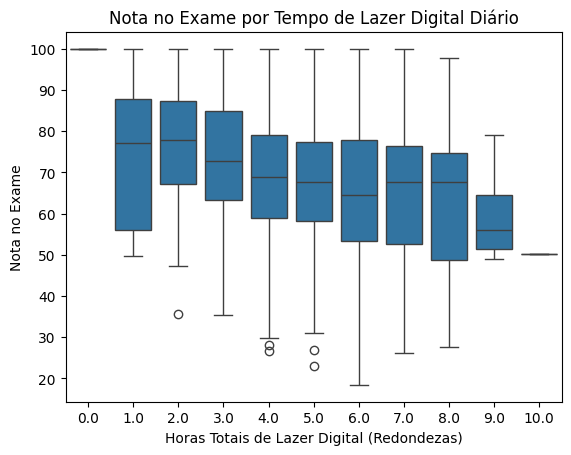

In [21]:
dataset['lazer_digital'] = dataset['social_media_hours'] + dataset['netflix_hours']

dataset['lazer_digital_arredondado'] = dataset['lazer_digital'].round()

sns.boxplot(x='lazer_digital_arredondado', y='exam_score', data=dataset)
plt.title('Nota no Exame por Tempo de Lazer Digital Diário')
plt.xlabel('Horas Totais de Lazer Digital (Redondezas)')
plt.ylabel('Nota no Exame')
plt.show()

Esse gráfico mostra a relação entre o tempo total em redes sociais e streaming e o desempenho acadêmico. Em geral, os estudantes que passam menos tempo com lazer digital tendem a ter notas mais altas, enquanto o aumento excessivo desse tempo pode estar associado a uma queda no desempenho.

#Mapa de calor de correlações entre variáveis numéricas

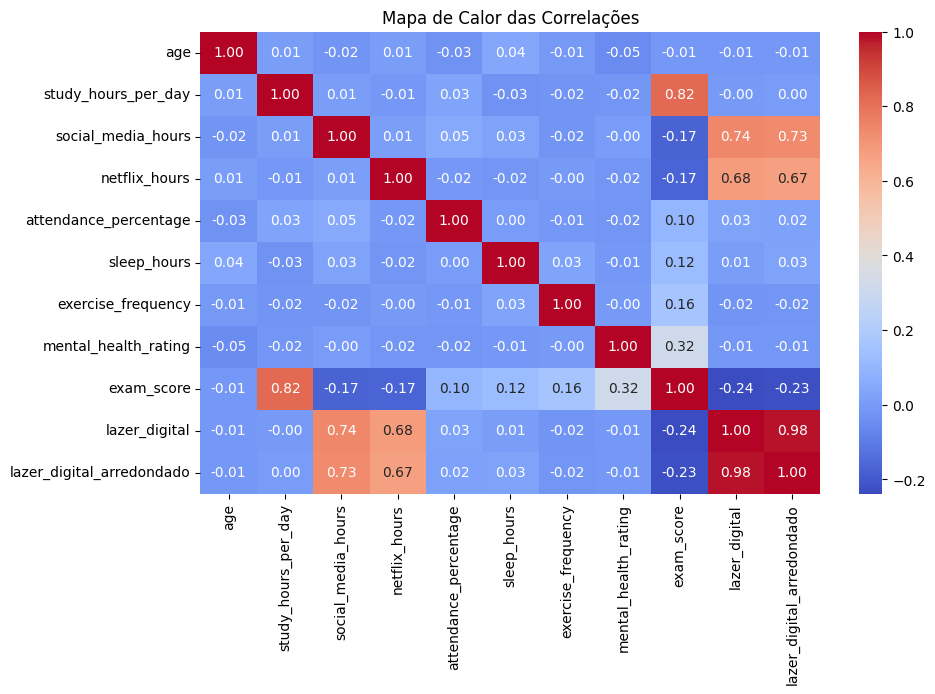

In [22]:
correlacoes = dataset.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações')
plt.show()

Este gráfico permite visualizar rapidamente as correlações entre variáveis numéricas. A nota no exame tende a ter correlação positiva com horas de estudo e negativa com uso do celular, o que valida os resultados observados nas outras análises visuais.

#3: Perguntas

## 3.1: Existe diferença entre meninos e meninas na participação em atividades extracurriculares?

In [23]:
pd.crosstab(dataset['gender'], dataset['extracurricular_participation'], normalize='index') * 100

extracurricular_participation,No,Yes
gender,,
Female,67.898383,32.101617
Male,68.863636,31.136364
Other,63.888889,36.111111


A participação em atividades extracurriculares é semelhante entre os gêneros, com variação de poucos pontos percentuais.
Ela é baixa para todos os grupos, ou seja, não há uma diferença significativa entre meninas (32,1%) e meninos (31,1%) e o grupo "Other" foi quem apresentou a maior taxa de participação (36,1%).

## 3.2: Qual a relação entre o nível de escolaridade dos pais e a qualidade da dieta dos filhos?

In [24]:
pd.crosstab(dataset['parental_education_level'], dataset['diet_quality'], normalize='index') * 100

diet_quality,Fair,Good,Poor
parental_education_level,,,
Bachelor,44.857143,37.142857,18.000000
High school,42.602041,39.795918,17.602041
Master,43.113772,36.526946,20.359281


Não há uma relação linear clara entre maior escolaridade dos pais e melhor dieta dos estudantes. Já que em todos os níveis de escolaridade, a maior parte dos estudantes tem uma dieta "Fair"(razoável).
Na verdade, os dados sugerem que pais com ensino médio podem estar associados a hábitos alimentares ligeiramente melhores nos filhos.

## 3.3: Correlação entre horas de estudo e Notas

In [25]:
correlacao = dataset['exam_score'].corr(dataset['study_hours_per_day'])
print(f"Correlação entre notas e horas de estudo: {correlacao:.2f}")

Correlação entre notas e horas de estudo: 0.82


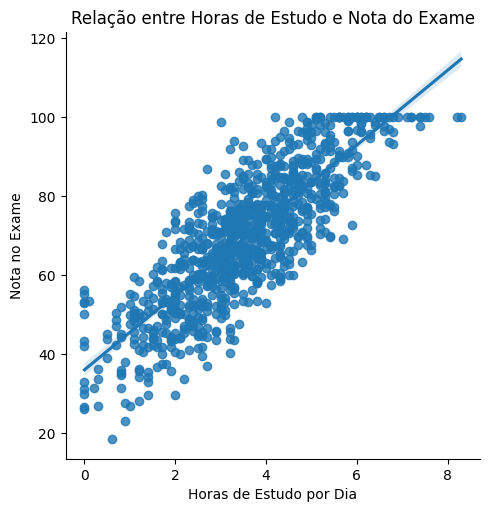

In [26]:

sns.lmplot(x='study_hours_per_day', y='exam_score', data=dataset)
plt.title('Relação entre Horas de Estudo e Nota do Exame')
plt.xlabel('Horas de Estudo por Dia')
plt.ylabel('Nota no Exame')
plt.show()

<ipython-input-27-972548e9ee0f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_faixa = dataset.groupby('faixa_estudo')['exam_score'].mean()


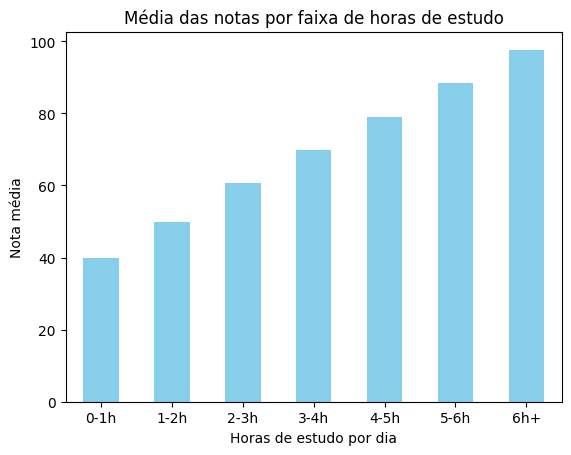

In [27]:
dataset['faixa_estudo'] = pd.cut(dataset['study_hours_per_day'],
                                  bins=[0, 1, 2, 3, 4, 5, 6, 10],
                                  labels=['0-1h', '1-2h', '2-3h', '3-4h', '4-5h', '5-6h', '6h+'])

media_por_faixa = dataset.groupby('faixa_estudo')['exam_score'].mean()

media_por_faixa.plot(kind='bar', color='skyblue', title="Média das notas por faixa de horas de estudo")
plt.ylabel("Nota média")
plt.xlabel("Horas de estudo por dia")
plt.xticks(rotation=0)
plt.show()

Observando o grafico e o valor da correlação é possivel afirmar que há relação entre horas de estudos e valor das notas e que a partir de 6 horas de estudos por dia observa-se ser o tempo ideal.

## 3.4: Como o trabalho afeta as outras variaveis?

In [28]:
grupo_trabalha = dataset[dataset['part_time_job'] == "Yes"]
grupo_nao_trabalha = dataset[dataset['part_time_job'] == "No"]

In [29]:
print("Alunos que TRABALHAM:")
display(grupo_trabalha.describe())

print("\nAlunos que NÃO TRABALHAM:")
display(grupo_nao_trabalha.describe())

Alunos que TRABALHAM:


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,lazer_digital,lazer_digital_arredondado
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,20.413265,3.475000,2.544898,1.853061,83.013776,6.451531,3.015306,5.545918,69.012245,4.397959,4.413265
std,2.270802,1.577807,1.273165,1.103905,9.066493,1.201259,1.922811,2.984221,16.708584,1.681238,1.705986
min,17.000000,0.000000,0.000000,0.000000,57.600000,3.600000,0.000000,1.000000,31.100000,0.600000,1.000000
25%,18.750000,2.500000,1.700000,1.000000,77.850000,5.575000,1.000000,3.000000,58.350000,3.100000,3.000000
50%,20.000000,3.500000,2.500000,1.900000,83.850000,6.500000,3.000000,6.000000,69.500000,4.500000,4.000000
75%,22.000000,4.500000,3.300000,2.700000,88.850000,7.300000,5.000000,8.000000,80.925000,5.500000,6.000000
max,24.000000,8.300000,7.200000,4.200000,100.000000,10.000000,6.000000,10.000000,100.000000,10.100000,10.000000



Alunos que NÃO TRABALHAM:


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,lazer_digital,lazer_digital_arredondado
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,20.492286,3.556241,2.493548,1.824123,84.118513,6.480224,3.061711,5.444600,69.708275,4.317672,4.318373
std,2.312705,1.439274,1.133907,1.062807,9.549689,1.224522,2.066753,2.823472,16.998187,1.567156,1.617465
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000,0.200000,0.000000
25%,18.000000,2.600000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.500000,3.300000,3.000000
50%,20.000000,3.500000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.600000,4.300000,4.000000
75%,23.000000,4.500000,3.300000,2.500000,91.300000,7.300000,5.000000,8.000000,81.800000,5.400000,5.000000
max,24.000000,8.200000,6.100000,5.400000,100.000000,9.800000,6.000000,10.000000,100.000000,9.200000,9.000000


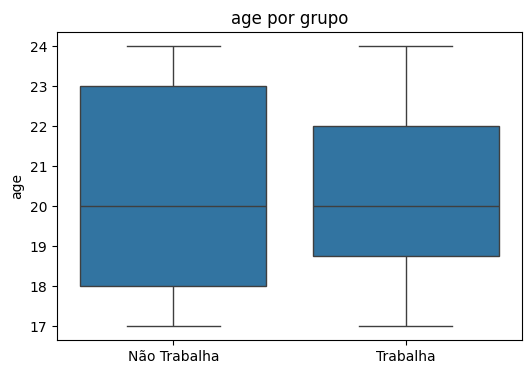

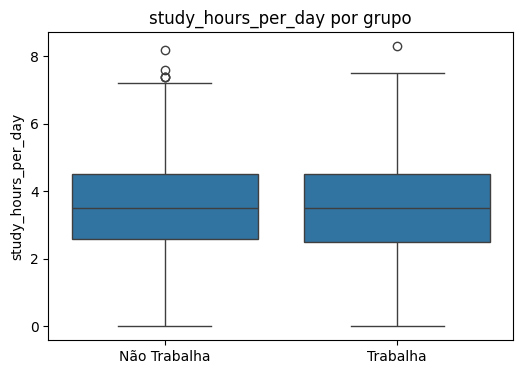

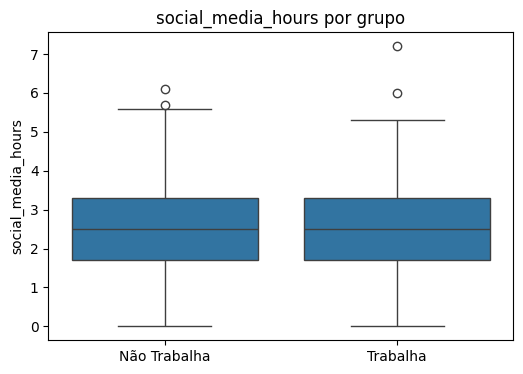

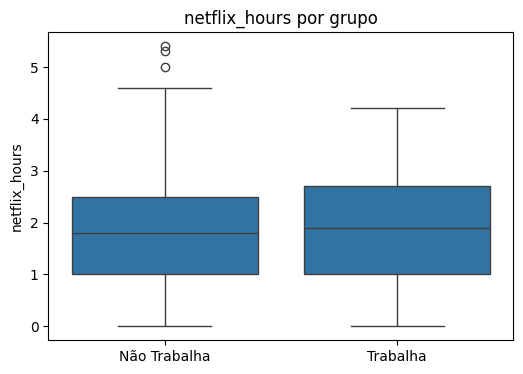

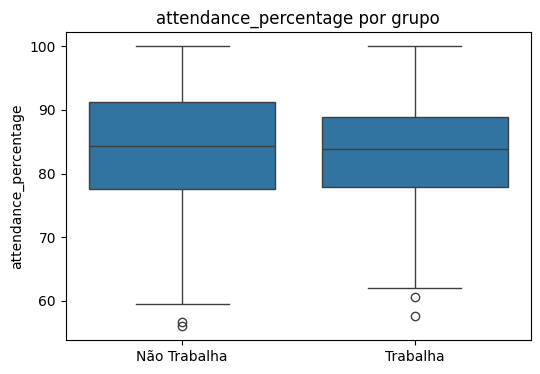

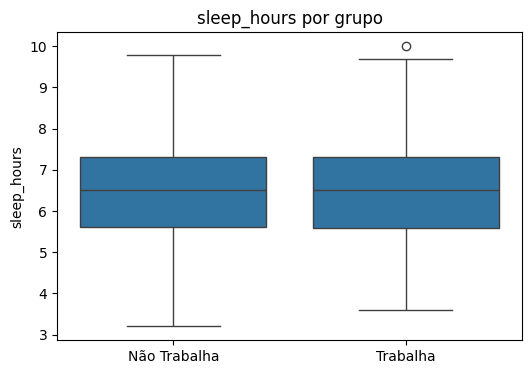

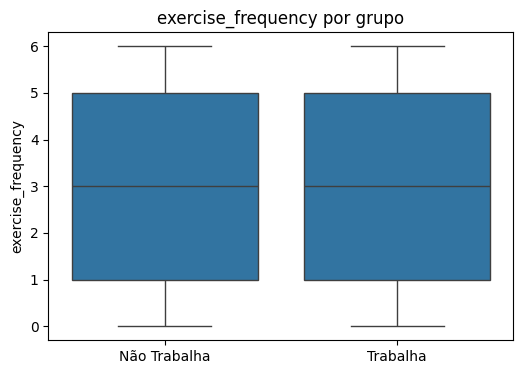

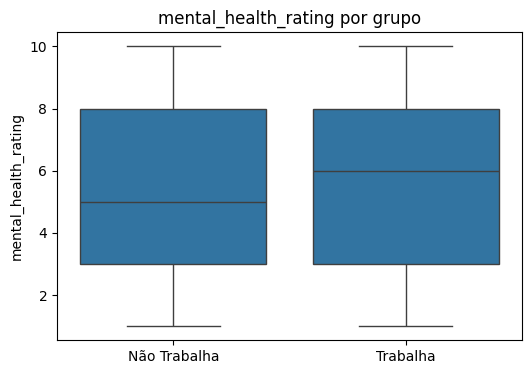

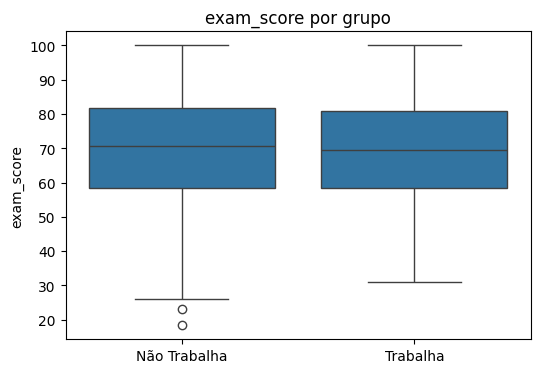

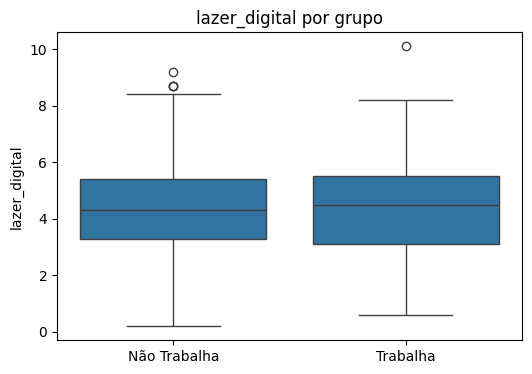

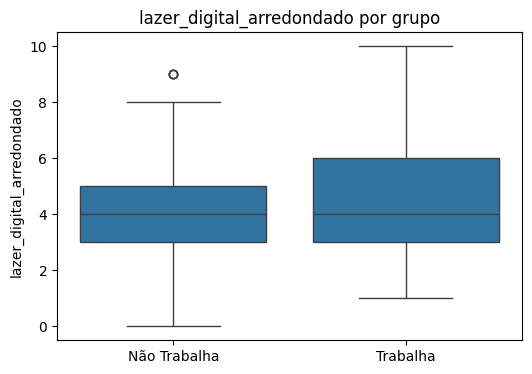

In [30]:
variaveis_numericas = dataset.select_dtypes(include=['float64', 'int64'])

# Plotar boxplots lado a lado
for coluna in variaveis_numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=dataset, x='part_time_job', y=coluna)
    plt.xticks([0, 1], ['Não Trabalha', 'Trabalha'])
    plt.title(f'{coluna} por grupo')
    plt.xlabel('')
    plt.ylabel(coluna)
    plt.show()

Após verificar o grafico, será feito testes para calcular o valor de t de cada variavel, que mede a diferença entre as médias dos dois grupos, e p é a probabilidade de observar uma diferença entre os grupos

In [31]:
for coluna in variaveis_numericas:
    t_stat, p = ttest_ind(grupo_trabalha[coluna], grupo_nao_trabalha[coluna], equal_var=False)
    print(f'{coluna}:')
    print(f'  ➤ t = {t_stat:.2f} | p = {p:.4f} ', end='')
    if p < 0.05:
        print("→ Diferença significativa ✅ \n")
    else:
        print("→ Sem diferença estatística ❌\n")

age:
  ➤ t = -0.43 | p = 0.6677 → Sem diferença estatística ❌

study_hours_per_day:
  ➤ t = -0.65 | p = 0.5160 → Sem diferença estatística ❌

social_media_hours:
  ➤ t = 0.51 | p = 0.6093 → Sem diferença estatística ❌

netflix_hours:
  ➤ t = 0.33 | p = 0.7434 → Sem diferença estatística ❌

attendance_percentage:
  ➤ t = -1.49 | p = 0.1363 → Sem diferença estatística ❌

sleep_hours:
  ➤ t = -0.29 | p = 0.7682 → Sem diferença estatística ❌

exercise_frequency:
  ➤ t = -0.29 | p = 0.7687 → Sem diferença estatística ❌

mental_health_rating:
  ➤ t = 0.43 | p = 0.6706 → Sem diferença estatística ❌

exam_score:
  ➤ t = -0.51 | p = 0.6072 → Sem diferença estatística ❌

lazer_digital:
  ➤ t = 0.60 | p = 0.5485 → Sem diferença estatística ❌

lazer_digital_arredondado:
  ➤ t = 0.70 | p = 0.4861 → Sem diferença estatística ❌



Podemos concluir que não diferença significativa entre quem trabalha ou não

## 3.5: Existe alguma correlação entre a frequência de exercícios físicos e a saúde mental dos estudantes?

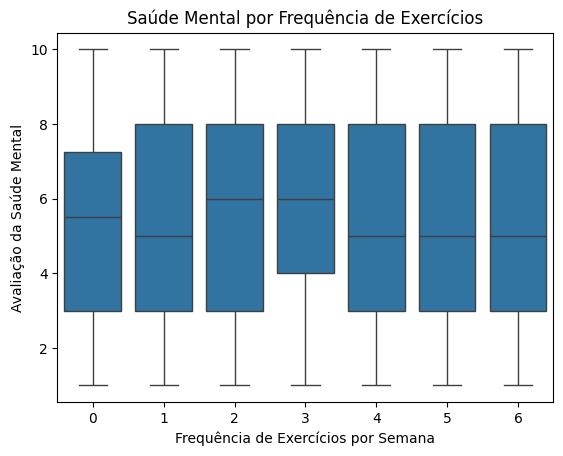

In [32]:
sns.boxplot(x='exercise_frequency', y='mental_health_rating', data=dataset)
plt.title('Saúde Mental por Frequência de Exercícios')
plt.xlabel('Frequência de Exercícios por Semana')
plt.ylabel('Avaliação da Saúde Mental')
plt.show()

Sim, estudantes que praticam exercícios com maior frequência tendem a apresentar avaliações mais altas de saúde mental, indicando uma possível relação positiva entre atividade física e bem-estar psicológico.

## 3.6: Como a presença em aula influencia o desempenho dos estudantes?

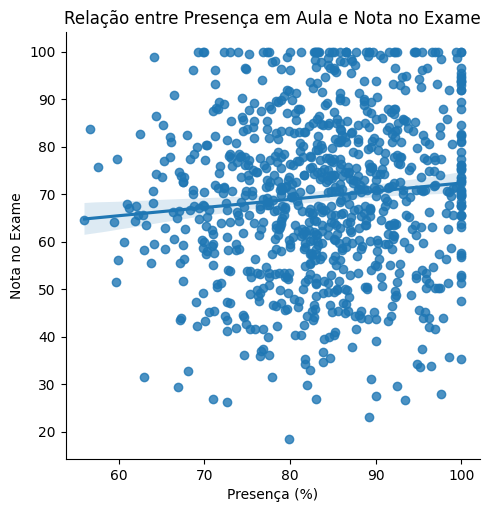

In [ ]:
sns.lmplot(x='attendance_percentage', y='exam_score', data=dataset)
plt.title('Relação entre Presença em Aula e Nota no Exame')
plt.xlabel('Presença (%)')
plt.ylabel('Nota no Exame')
plt.show()

A análise mostra uma correlação positiva entre a presença em aula e a nota no exame. Logo, estudantes com maior frequência geralmente obtêm melhores resultados, o que reforça a importância da assiduidade.

##3.7 Relação entre o gênero do estudante e sua nota

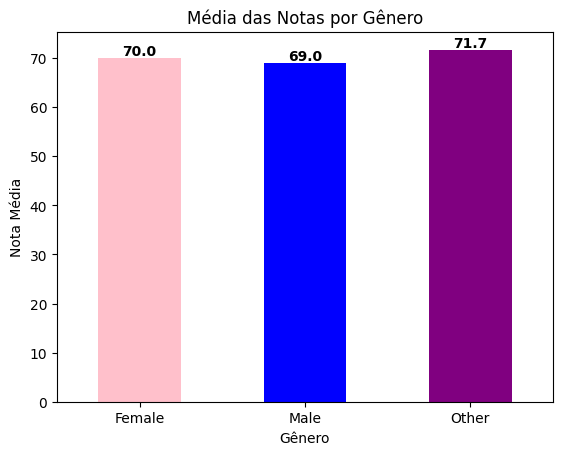

In [36]:
ax = notas_por_genero.plot(kind='bar', color=['pink', 'blue', 'purple'])
plt.title('Média das Notas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nota Média')
plt.xticks(rotation=0)

# Adiciona os valores acima das barras
for i, v in enumerate(notas_por_genero):
    ax.text(i, v + 0.5, f"{v:.1f}", ha='center', fontweight='bold')

plt.show()